In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
measurements = pd.read_csv('test2.txt', sep=',', header=0)
measurements.iloc[:,0] = measurements.iloc[:,0] * 0.2
measurements.iloc[:,1] = measurements.iloc[:,1] * 5
measurements.iloc[:,2] = measurements.iloc[:,2] * 5
measurements

time  cur_val  target  pwm_1500us  steer
0    0.0      0.0       0       0.000     50
1    0.2      0.0       0       0.000     50
2    0.4      0.0      50      90.500     50
3    0.6     17.5      50      73.325     50
4    0.8     28.5      50      65.840     50
5    1.0     40.5      50      52.305     50
6    1.2     38.0      50      60.875     50
7    1.4     38.5      50      64.020     50
8    1.6     43.5      50      59.025     50
9    1.8     38.0      50      71.555     50
10   2.0     42.0      50      68.185     50
11   2.2     45.0      50      65.795     50
12   2.4     48.5      50      61.390     50
13   2.6     46.5      50      65.745     50
14   2.8     48.5      50      63.230     50
15   3.0     46.5      50      67.495     50
16   3.2     48.5      50      64.980     50
17   3.4     50.0      50      62.910     50
18   3.6     50.0      50      63.000     50
19   3.8     46.5      50      69.335     50
20   4.0     45.0      50      73.065     50
21   4.2     52.0      50      62.055     50
22   4.4     55.0      50      56.345     50
23   4.6     48.0      50      67.445     50
24   4.8     48.5      50      66.820     50
25   5.0     50.0      50      64.660     50
26   5.2     50.0      50      64.750     50
27   5.4     46.5      50      71.085     50
28   5.6     48.5      50      68.480     50
29   5.8     53.5      50      60.075     50
30   6.0     51.5      50      62.770     50
31   6.2     53.5      50      58.505     50
32   6.4     48.0      50      67.355     50
33   6.6     45.0      50      73.155     50
34   6.8     48.5      50      68.390     50
35   7.0     50.0      50      66.410     50
36   7.2     53.5      50      60.165     50
37   7.4     48.0      50      69.105     50
38   7.6     48.5      50      68.570     50
39   7.8     46.5      50      72.745     50
40   8.0     52.0      50      63.895     50
41   8.2     55.0      50      58.095     50
42   8.4     51.5      50      62.860     50
43   8.6     46.5      50      71.175     50
44   8.8     48.5      50      68.480     50
45   9.0     53.5      50      60.075     50
46   9.2     51.5      50      62.770     50
47   9.4     50.0      50      64.840     50
48   9.6     46.5      50      71.085     50
49   9.8     48.5      50      68.480     50
50  10.0     53.5      50      60.075     50
51  10.2     51.5       0     -27.730     50
52  10.4     39.5       0     -21.155     50
53  10.6     24.5       0      -8.550     50
54  10.8      9.5       0       9.125     50
55  11.0      1.5       0      19.380     50

In [3]:
fig, ax = plt.subplots(1,1)
ax_twin = ax.twinx()
ax.xaxis.set_ticks(np.arange(0, 11.2, 0.2))
fig.autofmt_xdate(rotation=90, ha='center')
fig.set_size_inches(10, 5)
ax.set_xlabel('time in seconds')
ax.set_ylabel('interrupts per second')
ax_twin.set_ylabel('pwm - 1500µs')


ax.plot(measurements['time'], measurements['cur_val'], label='current value')
ax.step(measurements['time'], measurements['target'], label='target', where='post')
ax_twin.step(measurements['time'], measurements['pwm_1500us'], c='g', label='pwm', where='post')
ax.legend()
ax_twin.legend()
None

In [4]:
interrupts_way = np.array([[24, 30],[40, 50], [76, 100], [136, 200], [178, 250]])

In [5]:
interrupts_way[:,0]

array([ 24,  40,  76, 136, 178])

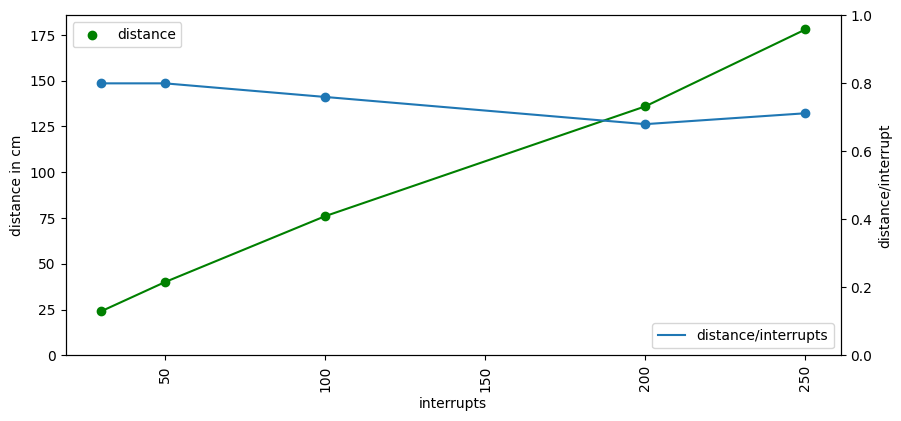

In [6]:
fig, ax = plt.subplots(1,1)
ax_twin = ax.twinx()
fig.autofmt_xdate(rotation=90, ha='center')
fig.set_size_inches(10, 5)

ax.set_xlabel('interrupts')
ax.set_ylabel('distance in cm')
ax_twin.set_ylabel('distance/interrupt')
ax.scatter(interrupts_way[:,1], interrupts_way[:,0], label='distance', c='g')
ax.plot(interrupts_way[:,1], interrupts_way[:,0], c='g')
ax_twin.plot(interrupts_way[:,1], interrupts_way[:,0]/interrupts_way[:,1], label='distance/interrupts')
ax_twin.scatter(interrupts_way[:,1], interrupts_way[:,0]/interrupts_way[:,1])

ax_twin.set_ylim(ymin=0, ymax=1)
ax.set_ylim(ymin=0)
ax.legend()
ax_twin.legend(loc='lower right')
